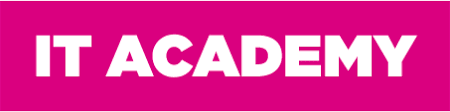

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Statistical Foundations for Data Scientist</u></b></center></font>
<br/><br/>
\begin{align*}Alex\:Kumenius\end{align*}
\begin{align*}Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\hspace{2mm}Project\hspace{2mm}Integrator\end{align*}
<br/><br/>
\begin{align*}Date : October\hspace{2mm}26th\hspace{2mm},2020\end{align*}</div>

# <span style=color:darkblue>DISTRIBUTION OF RANDOM VARIABLES</span>

## <span style=color:darkred> NORMAL DISTRIBUTION OR GAUSSIAN DISTRIBUTION</span>

<span style=color:blue>Normal Distribution</span>, also known as <span style=color:blue><b><u>Gaussian distribution</u></b></span>, is everywhere in Statistics and Data Science. You will encounter it at many places especially in topics of  <span style=color:blue><b><i>statistical inference</i></b></span>. It is one of the assumptions of many data science algorithms too.

<div class="alert alert-warning alert-warning"><b><u>Normal Distribution</u></b>   

A <span style=color:blue>Normal Distribution</span> always describes a <b>symmetric, unimodal</b>, and <b>bell-shaped density curve</b> described by its <span style=color:blue><b>mean$\:$ ($\mu$)</b></span> and <span style=color:blue><b>standard deviation$\:$ ($\sigma$)</b></span>. The density curve is <span style=color:blue>symmetrical</span>, centered about its <span style=color:blue>mean</span>, with its spread determined by its <span style=color:blue>standard deviation</span> showing that data near the <span style=color:blue>mean</span> are more frequent in occurrence than data far from the <span style=color:blue>mean</span>.   
$%$   
If a <span style=color:blue>Normal Distribution</span> has a <span style=color:blue><b>mean$\:$ ($\mu$)</b></span> and a <span style=color:blue><b>Standard Deviation$\:$ ($\sigma$)</b></span> we will write the distribution as :   
$%$   
\begin{align*} N(\mu,\hspace{2mm}\sigma)\end{align*}   
$%$   
Because the <span style=color:blue>mean</span> and <span style=color:blue>standard deviation</span> describe a <span style=color:blue>Normal Distribution</span> exactly, they are called the <span style=color:blue><b>Distribution’s Parameters</b></span>.   
$%$   
The <span style=color:blue>Normal Distribution</span> with <span style=color:blue><b>mean$\:$ $\mu$ = 0</b></span> and <span style=color:blue><b>Standard Deviation$\:$ $\sigma$ = 1</b></span> is called the <span style=color:blue><b><u>Standard Normal Distribution</u></b></span>, and we will write the distribution as :   
$%$   
\begin{align*} N(\mu = 0,\hspace{2mm}\sigma = 1)\end{align*}</div>

In [1]:
# Import all libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.mlab import normpdf
import warnings
import scipy
from scipy.integrate import quad
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import seaborn as sns
% matplotlib inline

# This is needed for z table formatting
pd.options.display.float_format = '{:<.4f}'.format

warnings.filterwarnings('ignore')

% matplotlib inline

<span style=color:blue>Draw samples</span> from the <span style=color:blue>distribution</span>:

In [2]:
mu, sigma = 1500, 300 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
type(s), s.shape, s.dtype

(numpy.ndarray, (1000,), dtype('float64'))

<span style=color:red><b><u>EXERCISE - 5.1</u></b></span> 

Display the <span style=color:blue>histogram of the samples</span>, along with the <span style=color:blue>probability density function</span>:

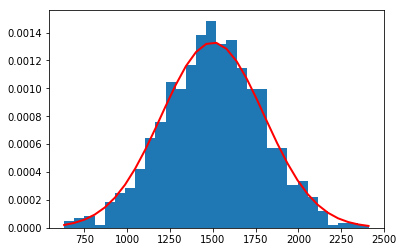

In [3]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 30, density=True)  # switch to True to depict density curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [4]:
list(ignored)

<span style=color:red><b><u>EXERCISE - 5.2</u></b></span> 

Let's plot a <span style=color:blue><b>Normal Distribution</b></span> density curve with <span style=color:blue>mean = 0</span> and <span style=color:blue>standard deviation = 1</span> ...

\begin{align*} N(\mu = 0,\hspace{1mm}\sigma = 1)\end{align*}

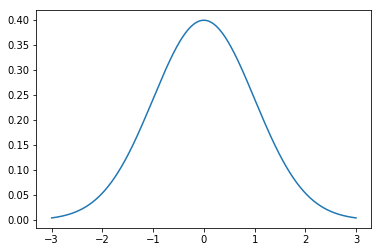

In [5]:
import pylab
import numpy as np
from scipy.stats import norm

x = np.linspace(-3,3,1000)
mu = 0
sd = 1
y = norm.pdf(x, loc = mu, scale = sd)    # for example
pylab.plot(x, y)
pylab.show()

<span style=color:red><b><u>EXERCISE - 5.3</u></b></span> 

... and the <span style=color:blue><b>Normal Distribution</b></span> with  <span style=color:blue>mean = 19</span> and  <span style=color:blue>standard deviation  = 4</span>. 

\begin{align*} N(\mu = 19,\hspace{1mm}\sigma = 4)\end{align*}

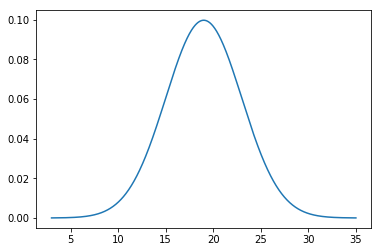

In [6]:
import pylab
import numpy as np
from scipy.stats import norm

x = np.linspace(3,35,1000)
mu = 19
sd = 4
y = norm.pdf(x, loc = mu, scale = sd)    # for example
pylab.plot(x, y)
pylab.show()

1.- Changing the  <span style=color:blue><b>mean $\mu$</b></span> <b><i>shifts</i></b> the bell curve to the  <span style=color:blue><i>left or right</i></span>,   
   
2.- while changing the  <span style=color:blue><b>standard deviation $\sigma$</b></span> <b><i>stretches or constricts</i></b> the curve.

<span style=color:red><b><u>EXERCISE - 5.4</u></b></span> 

Let's plot together and on the same scale the above plotted curve :

The data is the superposition of two  <span style=color:blue>normal samples</span>, the model a sum of  <span style=color:blue><b>Gaussian curves</b></span>. we obtain :

\begin{align*} N(\mu = 0,\hspace{1mm}\sigma = 1)\hspace{2mm}and\hspace{2mm}N(\mu = 19,\hspace{1mm}\sigma = 4)\end{align*}

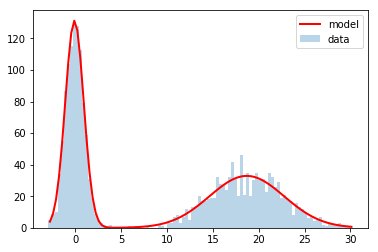

In [7]:
from pylab import *
from scipy.optimize import curve_fit

data = concatenate(( normal(0,1,1000), normal(19,4,1000)))
y, x, _ = hist(data, 100, alpha = 0.3, label='data')

x = (x[1:] + x[:-1]) / 2 # for len(x)==len(y)

def gauss(x, mu, sigma, A):
    return A*exp(-(x - mu)**2/2/sigma**2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1) + gauss(x, mu2, sigma2, A2)

expected = (0, 1, 1000, 19, 4, 1000)
params, cov = curve_fit(bimodal, x, y, expected)           # cov variabilidad de 2 variables conjuntas
sigma = sqrt(diag(cov))
plot(x, bimodal(x,*params),color='red',lw=2,label='model')
legend()
# print(params,'\n',sigma)

And the <span style=color:blue>estimate parameters</span> are :

In [8]:
pd.DataFrame(data={'params':params,'sigma':sigma},index = bimodal.__code__.co_varnames[1:])

,params,sigma
mu1,-0.0685,0.0190
sigma1,1.0085,0.0191
A1,131.2979,2.1460
mu2,18.7002,0.1526
sigma2,4.0736,0.1529
A2,32.9044,1.0677


In [9]:
bimodal.__code__.co_varnames[1:]

('mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2')

Both curves represent the <span style=color:blue>Normal Distribution</span>, however, they differ in their center and spread. The <span style=color:blue>Normal Distribution</span> with <span style=color:blue>mean = 0</span> and <span style=color:blue>standard deviation = 1</span> is called the <span style=color:blue><b>Standard Normal Distribution</b></span>.

Many variables are nearly normal, but <span style=color:red><b>none are exactly normal</b></span>. Thus the normal distribution, <span style=color:red>while <b>not perfect</b> for any single problem</span>, is very useful for a variety of problems. We will use it in data exploration and to solve important problems
in statistics.

# <span style=color:darkblue>NORMAL DISTRIBUTION RULE</span>

One reason the <span style=color:blue><b>normal distribution</b></span> is important is that many variables are <span style=color:blue>distributed approximately <b><u>normally</u></b></span>.

Despite the <span style=color:red><b>different</b> shapes</span>, <span style=color:blue><u>all forms</u></span> of the <span style=color:blue>normal distribution</span> have the following characteristic properties.

1. They’re all <span style=color:blue><b>symmetric</b></span>. The <span style=color:blue>normal distribution</span> <span style=color:red><b><u>cannot</u></b> model</span> <span style=color:blue><b>skewed</b> distributions</span>.
2. The <span style=color:blue><b>mean, median</b>, and <b>mode</b> are all <u>equal</u></span>.
3. <span style=color:blue><b>Half</b></span> of the population <span style=color:red><b>is less than</b></span> the <span style=color:blue><b>mean</b></span> and <span style=color:blue><b>half</b> is greater than</span> the <span style=color:blue><b>mean</b></span>.
4. The <span style=color:blue><b>Empirical Rule</b></span> allows you <span style=color:blue>to <u>determine</u> the <b>proportion</b> of <u>values</u></span> that <span style=color:blue><b>fall within</b></span> certain distances from the <span style=color:blue><b>mean</b></span>. 

## <span style=color:darkred>68-95-99.7 Empirical Rule</span>

Here, we present a useful rule of thumb for the <span style=color:blue><b>probability</b> of falling within 1, 2, and 3 <b>standard deviations</b> of the <b>mean</b> in the normal distribution</span>. This will be useful in a wide range of practical settings, especially when trying to make a <span style=color:blue>quick estimate</span> without a calculator or <span style=color:blue><b>Z-table</b></span>.

<div class="alert alert-warning alert-warning">

In a <b>Normal Distribution</b>, there is a <b>standard range of values</b> that generally fall within a certain number of <b>standard deviations</b> from the <b>mean</b>: </div>  

| % of total x values | range in distribution | z-scores from mean |
| ------------------------ | --------------------- | ------------------ |
| 68                       | $$μ±σ$$               |         ±1         |
| 95                       | $$μ±1.96σ$$           |       ±1.96        |
| 99                       | $$μ±2.58σ$$           |       ±2.58        |


Let’s graph this function with a range from -3 to 3.

In [7]:
x = np.linspace(-3, 3, num = 100)

constant = 1.0 / np.sqrt(2*np.pi)
normal_distribution = constant * np.exp((-x**2) / 2.0)

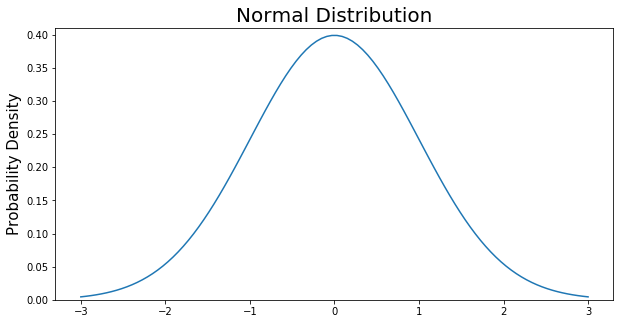

In [8]:
fig, ax = plt.subplots(figsize=(10,5));
ax.set_ylim(0,0.41);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 15);

ax.plot(x, normal_distribution);

The graph above <span style=color:red><b>does not</b> show</span> you the <span style=color:blue><b>probability of events</b></span> **but** their <span style=color:blue><b>probability density</b></span>.   
   
<span style=color:blue>To get the <b>probability of an event</b> within a <b>given <u>range</u></b></span> we will need <span style=color:blue><u>to integrate</u></span>.   

### <span style=color:darkgreen>Within 1 Standard Deviation</span>

Suppose we are interested in finding the <span style=color:blue><b>probability</b></span> of a random data point <span style=color:blue><b>landing</b> within 1 standard deviation</span> of the <span style=color:blue><b>mean</b></span>, we need to integrate from -1 to 1. This can be done with SciPy.

Math Expression 

$$\int_{1}^{-1} \frac{1}{\sqrt{2\pi}} e^{-x^2}/\hspace{1mm}2_{dx}$$

In [9]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0))

In [12]:
## Integrate PDF from -1 to 1
result_n1_1, _ = quad(normalProbabilityDensity, -1, 1, limit = 1000)
print(round(result_n1_1,4))

0.6827


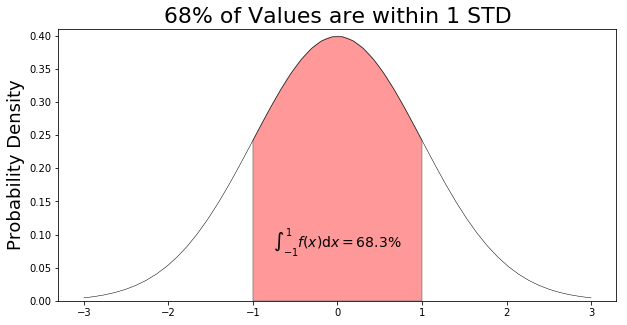

In [13]:
a, b = -1, 1 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(bottom=0, top=0.41)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-1}^{1} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n1_1*100),
         horizontalalignment='center', fontsize=14);

ax.set_title(r'68% of Values are within 1 STD', fontsize = 22);
ax.set_ylabel(r'Probability Density', fontsize = 18);
plt.show()
#fig.savefig('images/68_1_std.png', dpi = 1200)

<span style=color:blue><b>68%</b></span> of the data is <span style=color:blue>within 1 <u>**standard deviation**</u> ($\sigma$) of the <u>**mean**</u> ($\mu$)</span>.

### <span style=color:darkgreen>Within 2 Standard Deviation</span>

Suppose we are interested in finding the <span style=color:blue><b>probability</b></span> of a random data point <span style=color:blue><b>landing</b> within 2 standard deviation</span> of the <span style=color:blue><b>mean</b></span>, we need to integrate from -2 to 2.

Math Expression 

$$\int_{2}^{-2} \frac{1}{\sqrt{2\pi}} e^{-x^2}/\hspace{1mm}2_{dx}$$

In [14]:
# Make the PDF for the normal distribution a function
# def normalProbabilityDensity(x):
#    constant = 1.0 / np.sqrt(2*np.pi)
#    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2 to 2
result_n2_2, _ = quad(normalProbabilityDensity, -2, 2, limit = 1000)
print(round(result_n2_2, 3))

0.954


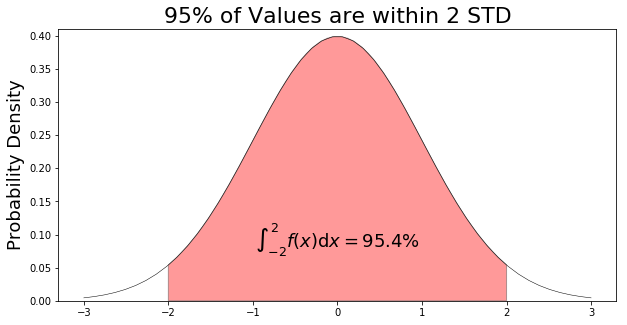

In [15]:
a, b = -2, 2 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(bottom=0, top=0.41)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-2}^{2} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n2_2*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'95% of Values are within 2 STD', fontsize = 22);
ax.set_ylabel(r'Probability Density', fontsize = 18);
plt.show()

<span style=color:blue><b>95%</b></span> of the data is <span style=color:blue>within 2 <u>**standard deviation**</u> ($\sigma$) of the <u>**mean**</u> ($\mu$)</span>.

### <span style=color:darkgreen>Within 3 Standard Deviation</span>

Suppose we are interested in finding the <span style=color:blue><b>probability</b></span> of a random data point <span style=color:blue><b>landing</b> within 3 standard deviation</span> of the <span style=color:blue><b>mean</b></span>, we need to integrate from -3 to 3.

Math Expression 

$$\int_{3}^{-3} \frac{1}{\sqrt{2\pi}} e^{-x^2}/\hspace{1mm}2_{dx}$$

In [16]:
# Integrate PDF from -3 to 3
result_n3_3, _ = quad(normalProbabilityDensity, -3, 3, limit = 1000)
print(round(result_n3_3, 3))

0.997


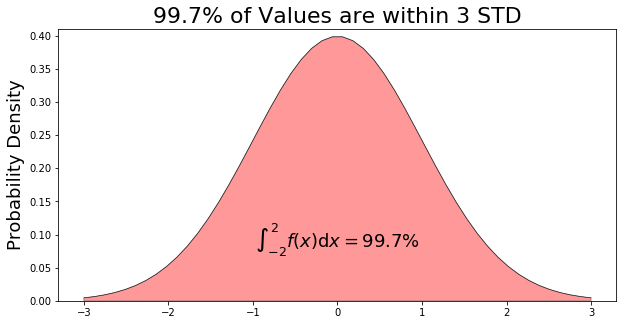

In [17]:
a, b = -3, 3 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(bottom=0, top=0.41)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-2}^{2} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n3_3*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'99.7% of Values are within 3 STD', fontsize = 22);
ax.set_ylabel(r'Probability Density', fontsize = 18);
plt.show()

<span style=color:blue><b>99.7%</b></span> of the data is <span style=color:blue>within 3 <u>**standard deviation**</u> ($\sigma$) of the <u>**mean**</u> ($\mu$)</span>.

### <span style=color:darkgreen>Negative Infinity to Positive Infinity</span>

For any <span style=color:blue><b>Probability Density Function - PDF</b></span>, the area under the curve must be **1** (<span style=color:blue><i>the probability of drawing any number from the function's range is always 1</i></span>).

In [18]:
# def normalProbabilityDensity(x):
#    constant = 1.0 / np.sqrt(2*np.pi)
#    return(constant * np.exp((-x**2) / 2.0) )

result_all, _ = quad(normalProbabilityDensity, np.NINF, np.inf)
print(round(result_all, 3))

1.0


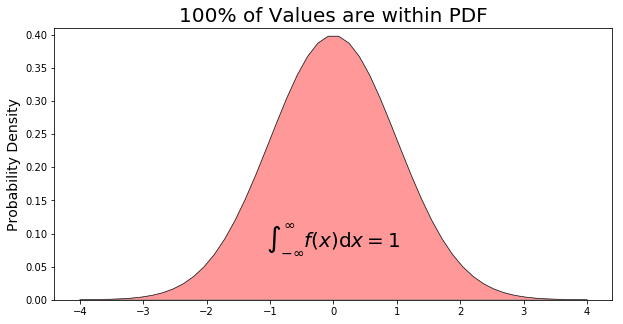

In [19]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 4 std deviations 
a, b = -4, 4 # integral limits

x = np.linspace(a, b)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(bottom=0, top=0.41)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-\infty}^{\infty} f(x)\mathrm{d}x = 1$",
         horizontalalignment='center', fontsize=20);

ax.set_title(r'100% of Values are within PDF', fontsize = 20);
ax.set_ylabel(r'Probability Density', fontsize = 14);

You will also find that it is also <span style=color:red>possible for observations</span> to fall 4, 5 or even more <span style=color:blue><b>standard deviations</b> from the <b>mean</b></span>, but this is <span style=color:red><b>very rare</b></span> if you have a <span style=color:blue>normal or nearly normal distribution</span>.

### <span style=color:darkgreen>Lets put together the Entire Graph</span>

In [20]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

In [21]:
# Area under curve for entire Graph
result, _ = quad(normalProbabilityDensity, np.NINF, np.inf)

# Integrate normal distribution from 0 to 1
result_0_1, _ = quad(normalProbabilityDensity, 0, 1, limit = 1000)

# Integrate normal distribution from -1 to 0
result_n1_0, _ = quad(normalProbabilityDensity, -1, 0, limit = 1000)

# Integrate normal distribution from 1 to 2
result_1_2, _ = quad(normalProbabilityDensity, 1, 2, limit = 1000)

# Integrate normal distribution from -2 to -1
result_n2_n1, _ = quad(normalProbabilityDensity, -2, -1, limit = 1000)

# Integrate normal distribution from 2 to 3
result_2_3, _ = quad(normalProbabilityDensity, 2, 3, limit = 1000)

# Integrate normal distribution from -3 to -2
result_n3_n2, _ = quad(normalProbabilityDensity, -3, -2, limit = 1000)

# Integrate normal distribution from 3 to 4
result_3_4, _ = quad(normalProbabilityDensity, 3, 4, limit = 1000)

# Integrate normal distribution from -4 to -3
result_n4_n3, _ = quad(normalProbabilityDensity, -4, -3, limit = 1000)

# Integrate normal distribution from 4 to inf
result_4_inf, error = quad(normalProbabilityDensity, 4, np.inf, limit = 1000)

[Text(0, 0, '0.00'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.10'),
 Text(0, 0, '0.15'),
 Text(0, 0, '0.20'),
 Text(0, 0, '0.25'),
 Text(0, 0, '0.30'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.40')]

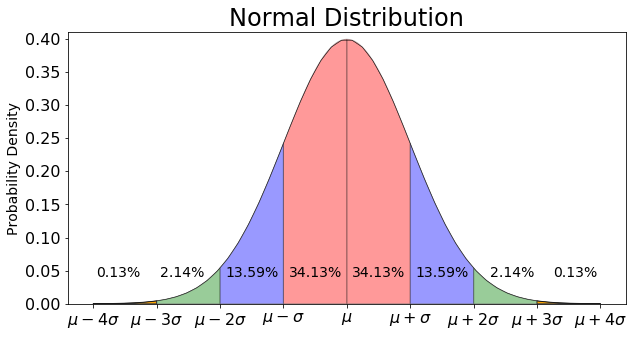

In [22]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(bottom=0,top=0.41)

#############################
a, b = 0, 1 # integral limits

# Make the shaded region
ix = np.linspace(0, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.5, .04, r'{0:.2f}%'.format(result_0_1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -1, 0 # integral limits

# Make the shaded region
ix = np.linspace(-1, 0)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-0.5, .04, r'{0:.2f}%'.format(result_n1_0*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 1, 2 # integral limits

# Make the shaded region
ix = np.linspace(1, 2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(1.5, .04, r'{0:.2f}%'.format(result_1_2*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -2, -1 # integral limits

# Make the shaded region
ix = np.linspace(-2, -1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-1.5, .04, r'{0:.2f}%'.format(result_n2_n1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 2, 3 # integral limits

# Make the shaded region
ix = np.linspace(2, 3)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);


##############################
a, b = -3, -2 # integral limits

# Make the shaded region
ix = np.linspace(-3, -2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 3, 4 # integral limits

# Region from 3 to 4
ix = np.linspace(3, 4)
iy = normalProbabilityDensity(ix)
verts = [(3, 0)] + list(zip(ix, iy)) + [(4, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(3.6, .04, r'{0:.2f}%'.format(result_3_4*100),
         horizontalalignment='center', fontsize=14);

# Region from -4 to -3
ix = np.linspace(-4, -3)
iy = normalProbabilityDensity(ix)
verts = [(-4, 0)] + list(zip(ix, iy)) + [(-3, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(-3.6, .040, r'{0:.2f}%'.format(result_n4_n3*100),
         horizontalalignment='center', fontsize=14);

ax.set_title(r'Normal Distribution', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 14)

xTickLabels = ['',
               r'$\mu - 4\sigma$',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$',
               r'$\mu + 4\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.set_yticklabels(yTickLabels, fontsize = 16)
#fig.savefig('images/Normal Distribution.png', dpi = 1200)

# <span style=color:darkblue>Standardizing with Z-scores</span>

A <span style=color:blue><i>standardization technique</i></span> called a <span style=color:blue><b>Z-score</b></span>, is a method most commonly employed for <span style=color:blue><b><i>nearly normal observations</i></b></span> but that may be used with any <span style=color:blue><b><i><u>distribution</u></i></b></span>.   
$%$   
A <span style=color:blue><b>z-score</b></span> is the number of <span style=color:blue><b>Standard Deviations</b></span> away from a <span style=color:blue><u>mean</u></span> for a data point.   
   
A <span style=color:blue><b>z-score</b></span> helps point out <span style=color:red>how unusual</span> or <span style=color:blue>usual</span> a data point is from the other values. A <span style=color:blue><b>z-score</b></span> must be used with a <span style=color:blue>normal distribution curve</span>.

<div class="alert alert-warning alert-warning"><b><u>Z-score</u></b>

The <b><u>Z-score</u></b> of an <b>observation $x$</b> is defined as the number of <b>standard deviations $\sigma$</b> it falls above or below the <b>mean $\mu$</b>.    
$%$   
We compute the <b><u>Z-score</u></b> for an <b>observation</b> $x$ that follows a distribution with <span style=color:blue>mean <b>$\mu$</b></span> and <span style=color:blue>standard deviation <b>$\sigma$</b></span> using :   
$%$   
\begin{align*} Z = \frac{x - \mu}{\sigma}\end{align*}
</div>

If the observation is one <span style=color:blue>Standard Deviation</span> above the <span style=color:blue>mean</span>, its <span style=color:blue><b>z-score</b></span> is <b>1</b>. If it is <b>1.5</b> <span style=color:blue>standard deviations</span> below the <span style=color:blue>mean</span>, then its <span style=color:blue><b>z-score</b></span> is <b>-1.5</b>. If <span style=color:blue><b>$x$</b></span> is an <span style=color:blue>observation</span> from a <span style=color:blue>distribution</span> <span style=color:blue><b>$N(\mu, \sigma)$</b></span>.

### <span style=color:darkred>SAT Score (numbers are faked)</span>

<span style=color:red><b><u>EXERCISE 5.5</u></b> :   

The distribution of SAT and ACT scores are both nearly normal.
Suppose <b>Ann</b> scored <b>1800</b> on her <b>SAT</b> and <b>Tom</b> scored <b>24</b> on his <b>ACT</b>. 

<span style=color:blue><b><i><u>Who performed better?</u></i></b></span>


$\mu_{SAT}$ = 1500,     
$\sigma_{SAT}$= 300,   
and $x_{Ann}$ = 1800   

Find Ann's <b>SAT</b> <b>Z-score</b>:

<span style=color:green><b><u>SOLUTION 5.5</u></b> :   

\begin{align*}Z_{Ann} = \frac{x_{Ann} - \mu_{SAT}}{\sigma_{SAT}} = \frac{1800 - 1500}{300} = 1\end{align*}

<span style=color:red><b><u>EXERCISE 5.6</u></b> :   

Check <b>Ann's SAT z-score</b> Math equation with a script :

In [23]:
mu_SAT = 1500
sigma_SAT = 300
x_Ann = 1800

Ann_z_score = (x_Ann - mu_SAT) / sigma_SAT
Ann_z_score

1.0

<span style=color:red><b><u>EXERCISE 5.7</u></b> :   

Implement the distribution code for <b>Ann's data $X_{Ann}$</b> :

In [24]:
mu, sigma = 1500, 300 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000) # random sample

h = sorted(s) # sorting random sample

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # drawing Probability Density curve

<span style=color:darkblue><b><u>EXEMPLE 5.1</u></b> :   

Plot <b>Ann's data $X_{Ann}$</b> distribution density curve and draw and label a vertical line on the normal distribution curve that shows where exactly $X_{Ann}$ falls in the curve:

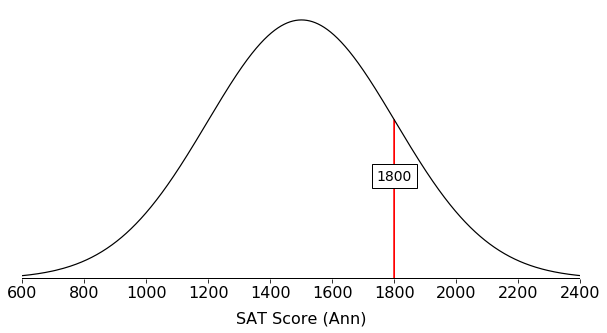

In [25]:
fig, ax = plt.subplots(figsize=(10, 5), frameon=False);
ax.plot(h, fit, 'k', linewidth=1.2);
ax.set_ylim(bottom=0);
ax.set_xlim(600, 2400);

df = pd.DataFrame(list(zip(h, fit)), columns = ['score', 'integral'])
df[(df['score'] >= 1799.90) & (df['score'] <= 1800.10) ].values.tolist()

# Make the shaded region
verts = [(1799.00, 0)] + df[(df['score'] >= 1799.00) & (df['score'] <= 1800.00) ].values.tolist() + [(1800.0, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='r', alpha = 1, linewidth = 1.2, linestyle = '-')
ax.add_patch(poly);
plt.xticks(fontsize = 16)
ax.set_xlabel('SAT Score (Ann)', fontsize = 16, labelpad=10)

ax.set_frame_on(False)
ax.axhline(0, c = 'k', linewidth = 3)
ax.get_yaxis().set_visible(False)
ax.text(1800,.0005, '1800', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'black', 'pad':5});
# plt.tight_layout()
#fig.savefig('SAT_Ann.png', dpi = 900)
plt.show()

### <span style=color:darkred>ACT Score (numbers are faked)</span>

<span style=color:red><b><u>EXERCISE 5.8</u></b> :   

Using :   

$\mu_{ACT}$ = 21,     
$\sigma_{ACT}$= 5,   
and $x_{Tom}$ = 24   

Find Tom's **ACT** **``Z-score``**:

\begin{align*}Z_{Tom} = \frac{x_{Tom} - \mu_{ACT}}{\sigma_{ACT}} = \frac{24 - 21}{5} = 0.60\end{align*}

<span style=color:red><b><u>EXERCISE 5.9</u></b> :   

Check <b>Tom's ACT z-score</b> Math equation with a script :

In [26]:
mu_SAT = 21
sigma_SAT = 5
x = 24

xT_z_score = (x - mu_SAT) / sigma_SAT
xT_z_score

0.6

<span style=color:red><b><u>EXERCISE 5.9</u></b> :   

Implement the distribution code for <b>Tom's data $X_{Tom}$</b> :

In [27]:
mu, sigma = 21, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

h = sorted(s)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

<span style=color:red><b><u>EXERCISE 5.10</u></b> :   

Plot <b>Tom's data $X_{Tom}$</b> distribution density curve and draw and label a vertical line on the normal distribution curve that shows where exactly $X_{Tom}$ falls in the curve:

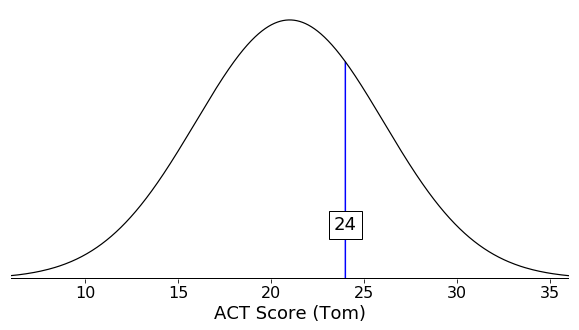

In [28]:
fig, ax = plt.subplots(figsize=(10, 5), frameon=False);
ax.plot(h, fit, 'k', linewidth=1.2);
ax.set_ylim(bottom=0);
ax.set_xlim(6, 36);

df = pd.DataFrame(list(zip(h, fit)), columns = ['score', 'integral'])
df[(df['score'] >= 23.99) & (df['score'] <= 24.00) ].values.tolist()

# Make the shaded region
ix = np.linspace(25, 25, num = 1)
verts = [(23.99, 0)] + df[(df['score'] >= 23.99) & (df['score'] <= 24.00) ].values.tolist() + [(24.00, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='b', alpha = 1, linewidth = 1.2, linestyle = '-')
ax.add_patch(poly);
#ax.set_xticks(list(range(4, 40, 4)))
plt.xticks(fontsize = 16)
ax.set_xlabel('ACT Score (Tom)', fontsize = 18)

ax.set_frame_on(False)
ax.axhline(0, c = 'k', linewidth = 3)
ax.get_yaxis().set_visible(False)

ax.text(24,.015, '24', horizontalalignment='center', fontsize=18,
            bbox={'facecolor':'white', 'edgecolor':'black', 'pad':5});
# plt.tight_layout()
# fig.savefig('ACT_Zoe.png', dpi = 900)
plt.show()

- <b>Observations</b> above the <span style=color:blue>mean</span> always have positive <span style=color:blue><b>Z-scores</b></span> while those below the <span style=color:blue>mean</span> have negative <span style=color:blue><b>Z-scores</b></span>.   
$%$   
- If an <b>observation</b> is equal to the <span style=color:blue>mean</span>, then the <span style=color:blue><b>Z-scores</b></span> is <b>0</b>.

<div class="alert alert-warning alert-warning">

We can use <span style=color:blue><b>Z-scores</b></span> to roughly identify which <b>observations</b> are more unusual than others. One observation $x_1$ is said to be more unusual than another observation $x_2$ if the absolute value of its <span style=color:blue><b>Z-scores</b></span> is larger than the absolute value of the other <span style=color:blue><b>observation’s Z-scores</b></span> : $|$Z_{1}$| > |$Z_{2}$|$.   
$%$   
This technique is especially insightful when a <span style=color:blue>distribution</span> is <span style=color:blue>symmetric</span>.</div>

We use the <b>standard deviation</b> as a guide:    

- Ann is 1 standard deviation above average on the SAT : 1500 + 1 * 300 = 1800.   
- Tom is 0.6 standard deviations above the mean on the ACT : 21 + 0.6 * 5 = 24.  

we can observe that <b>Ann</b> tends to do better with respect to everyone else than <b>Tom</b> did, so her score was better.

# <span style=color:darkblue>Probability Density Function - (PDF)</span>

To be able to understand where the percentages come from, it is important to know about the <span style=color:blue><b>Probability Density Function (PDF)</b></span>. A <span style=color:blue><b>PDF</b></span> is used to specify the <span style=color:blue><b><u>probability</u></b></span> of the <span style=color:blue>random variable</span> <span style=color:blue><i>falling within a particular range of values</i></span>, <span style=color:red><b>as opposed</b></span> <span style=color:blue>to taking on <b>any one value</b></span>.   

This <span style=color:blue><b><u>probability</u></b></span> is given by the **integral** of this variable’s **``PDF``** over that range — that is, it is given by the area under the **density function** but above the horizontal axis and between the *lowest* and *greatest* values of the range. This definition might not make much sense so let’s clear it up by graphing the probability density function for a normal distribution. The equation below is the probability density function for a normal distribution

## <span style=color:darkred>Cummulative Distribution Function -- (CDF)</span>

<div class="alert alert-warning alert-warning">

<b><u>Cumulative Distribution Function - (CDF)</u></b>   
$%$      
To find the area, you need to integrate. Integrating the <span style=color:blue><b>Probability Density Funtion (PDF)</b></span>, gives you the <span style=color:blue><b>Cumulative Distribution Function (CDF)</b></span> which is a function that maps values to their percentile rank in a distribution. The values in the table are calculated using the <span style=color:blue><b>Cumulative Distribution Function (CDF)</b></span> of a <span style=color:blue>Standard Normal distribution</span> with a mean of zero ($\bar{x}$ = 0) and a standard deviation of one ($\sigma$ = 1).   
$%$      
This can be denoted with the following equation :   
$%$      
$$\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} e^{-x^2}/\hspace{1mm}2_{dx}$$   
$%$   
Let’s simplify it by assuming we have a mean (μ) of 0 and a standard deviation (σ) of 1.   
$%$   
$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2}/\hspace{1mm}2$$
</div>

<span style=color:red><b><u>EXERCISE 5.10</u></b> :   

While we know that <b>Ann</b> performed better, a <b>z-table</b> can tell you in what <span style=color:blue>percentile</span> the test takers are in. This is the <b>probability</b>.

In [29]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

z_Ann = 1
z_Tom = 0.6

Ann_percentile, _ = quad(normalProbabilityDensity, np.NINF, z_Ann)
Tom_percentile, _ = quad(normalProbabilityDensity, np.NINF, z_Tom)

print('Ann Percentile: ', round(Ann_percentile, 2))
print('Tom Percentile : ', round(Tom_percentile, 2))

Ann Percentile:  0.84
Tom Percentile :  0.73


<span style=color:red><b><u>EXERCISE 5.11</u></b> :   

Implement the normal distribution code for <b>Ann's data $X_{Ann}$</b> :

In [30]:
mu, sigma = 1500, 300 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)

h = sorted(s)

fit = stats.norm.pdf(h, np.mean(h), np.std(h))

<span style=color:red><b><u>EXERCISE 5.12</u></b> :   

Let's shade  <span style=color:blue>Ann's percentile region</span> and label the normal distribution. We are interested in <span style=color:blue>Ann's percentile rank</span> in the distribution :

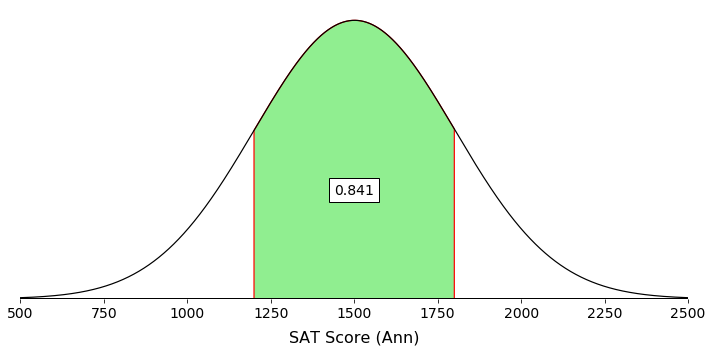

In [31]:
fig, ax = plt.subplots(figsize=(10, 5), frameon=False);
ax.plot(h, fit, 'k', linewidth=1.2);
ax.set_ylim(bottom=0);
ax.set_xlim(500, 2500);

df = pd.DataFrame(list(zip(h, fit)), columns = ['score', 'integral'])
df[(df['score'] >= 1499.90) & (df['score'] <= 1500.10) ].values.tolist()

# Make the shaded region
verts = [(1199.90, 0)] + df[(df['score'] >= 1199.90) & (df['score'] <= 1800.00) ].values.tolist() + [(1800, 0)]
poly = Polygon(verts, facecolor='lightgreen', edgecolor='r', alpha = 1, linewidth = 1.2, linestyle = '-')
ax.add_patch(poly);
plt.xticks(fontsize = 14)
ax.set_xlabel('SAT Score (Ann)', fontsize = 16, labelpad=10)

ax.set_frame_on(False)
ax.axhline(0, c = 'k', linewidth = 3)
ax.get_yaxis().set_visible(False)
ax.text(1500,.0005, round(Ann_percentile,3), horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'black', 'pad':5});
plt.tight_layout()
#fig.savefig('SAT_Mike.png', dpi = 900)

<span style=color:red><b><u>EXERCISE 5.13</u></b> :   

Cumulative SAT scores are approximated well by a normal model, N(μ = 1500,$\hspace{2mm}\sigma$ = 300).

<b>Shannon</b> is a <i>randomly selected SAT taker</i>, and nothing is known about <b>Shannon’s SAT</b> aptitude. 

What is the <b>probability Shannon scores at least 1630 on her SATs</b>?

Applying Maths to the example :   

\begin{align*}Z = \frac{x - \mu}{\sigma} = \frac{1630 - 1500}{300} = 0.43\end{align*}

<span style=color:red><b><u>EXERCISE 5.14</u></b> :  

Implement the distribution code for condition <b>Shannon's scores</b> above <b>1630</b> :

In [32]:
mu = 1500
sigma = 300
x = 1630

x_z_score = (x - mu) / sigma
round(x_z_score, 2)

0.43

<span style=color:red><b><u>EXERCISE 5.15</u></b> :  

We are interested in the chance that <b>Shannon's scores</b> above <b>1630</b>, so we must shade this upper tail:

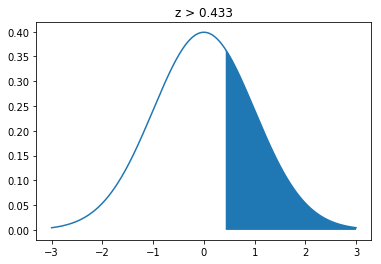

In [33]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

    
x = np.arange(-3,3,0.001)
z0 = 0.43
draw_z_score(x, x > z0, 0, 1, 'z > 0.433')

In [38]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

z_Shannon = .43

Shannon_percentile, _ = quad(normalProbabilityDensity, np.NINF, z_Shannon)

print('Shannon Percentile: ', round(Shannon_percentile, 3))

Shannon Percentile:  0.666


The <span style=color:blue>normal probability table</span> gives the <b>area to the left</b>. If you would like the <b>area to the right</b>, first <i><b>find the area to the left</b></i> and then <b>subtract</b> this amount from <b>one (1)</b>.

## <span style=color:green>Calculate and append $z-values$ on <i>ybrss_samp</i> Height Variable</span>

In [40]:
# Load only ybrss_samp's heights variables, isolating it in new 

yrbss_s=pd.read_csv('D:\Documents\EureCat\Formacion\Eurecat 2019\BTS\Datasets\yrbss_samp.csv', sep=',', encoding='utf-8', index_col=0, usecols=[0,6] )

Exploring the dataset

In [41]:
yrbss_s.shape

(100, 1)

In [42]:
yrbss_s.columns

Index(['height'], dtype='object')

In [35]:
yrbss_s.head()

,height
5653,1.5000
9437,1.7800
2021,1.7500
12187,1.6800
1690,1.7000


In [43]:
yrbss_s.describe()

,height
count,100.0000
mean,1.6969
std,0.0881
min,1.5000
25%,1.6300
50%,1.7000
75%,1.7500
max,1.9300


<span style=color:red><b><u>EXERCISE 5.16</u></b> :  

Plot the <b>Height's Normal Distribution</b> :

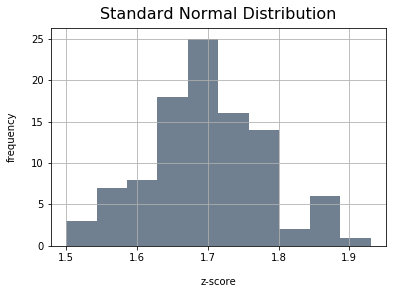

In [44]:
# Plot the Height's Normal Distribution

yrbss_s['height'].hist(color='slategray')
plt.title("Standard Normal Distribution", y=1.015, fontsize=16)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);

Calculate the <b>sample mean</b> height in <i>yrbss_s</i> using the <b>pandas series mean()</b> method.

In [45]:
yrbss_s_mean_heights = yrbss_s['height'].mean()
round(yrbss_s_mean_heights, 3)

1.697

Calculate the <b>sample standard deviation</b> height in <i>yrbss_s</i> using the <b>pandas series std()</b> method.

In [46]:
yrbss_s_std_heights = yrbss_s['height'].std()
round(yrbss_s_std_heights, 3)

0.088

<span style=color:red><b><u>EXERCISE 5.17</u></b> :  

Append <span style=color:blue><b>z-score</b></span> variable and <span style=color:blue><b>z-score values</b></span> into <b>ybrss_s</b> dataframe :

In [51]:
yrbss_s['z-score'] = (yrbss_s['height'] - yrbss_s_mean_heights) / yrbss_s_std_heights

yrbss_s.head(10)

,height,z-score
5653,1.5000,-2.2342
9437,1.7800,0.9429
2021,1.7500,0.6025
12187,1.6800,-0.1918
1690,1.7000,0.0352
13376,1.5700,-1.4399
8501,1.7800,0.9429
4583,1.6300,-0.7591
907,1.6300,-0.7591
3830,1.8300,1.5103


<div class="alert alert-warning alert-warning">

In a <b>Normal Distribution</b>, there is a <b>standard range of values</b> that generally fall within a certain number of <b>standard deviations</b> from the <b>mean</b>:</div>   

| % of total x values | range in distribution | z-scores from mean |
| ------------------------ | --------------------- | ------------------ |
| 68                       | $$μ±σ$$               |         ±1         |
| 95                       | $$μ±1.96σ$$           |       ±1.96        |
| 99                       | $$μ±2.58σ$$           |       ±2.58        |

There are 100 height values in <b><i>yrbss_s</i></b> dataset. Therefore, it's likely approximately <b>68%</b> of values are within <b>±1 z-scores</b> from the <b>mean</b>. Let's verify this with our dataset.

<span style=color:red><b><u>EXERCISE 5.18</u></b> :   

Verify / check what is the <b>% of total x values</b> within <b>±1 z-scores</b> from the <b>mean</b> ?

In [55]:
values_plus_minus_one_z_score = len(yrbss_s[yrbss_s['z-score'].between(-1, 1) == True])

percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(yrbss_s)*100

round(percent_values_plus_minus_one_z_score, 3)

68.0

<b>68.00%</b> of values fall within <b>±1 z-scores</b> from the mean which equals to <b>68%</b>.   

We standardized a <b>distribution</b> by getting every value's <b>z-score</b>. We can now visualize the <b>distribution</b> of <b>z-scores</b> below that correspond to specific <b>height values</b>. The histogram below looks like a normal distribution.

<span style=color:red><b><u>EXERCISE 5.19</u></b> :   

Plot the normal distribution of height's z-scores :

Does the histogram looks like a normal distribution ?

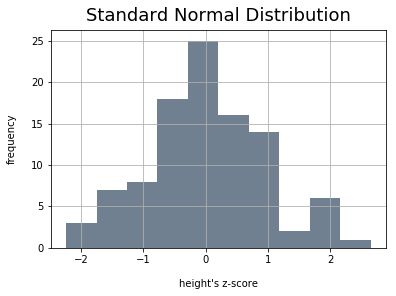

In [56]:
yrbss_s['z-score'].hist(color='slategray')
plt.title("Standard Normal Distribution", y=1.015, fontsize=18)
plt.xlabel("height's z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);

Every point in our dataset is now illustrated as the number of standard deviations away from the mean - represented by its z-score.
In the distribution above, the standard deviation is 1.

<span style=color:red><b><u>EXERCISE 5.20</u></b> :   
    
What's the <b>height's z-score Standard Deviation</b> ?

In [45]:
z_score_distribution_std_dev = round(yrbss_s['z-score'].std(), 3)
z_score_distribution_std_dev

1.0

---

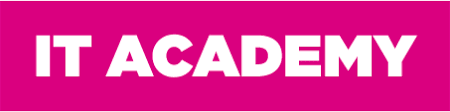

<div class="alert alert-block alert-info">\begin{align*}Alex\:Kumenius - Business\hspace{2mm}Intelligence\hspace{2mm}Data\hspace{2mm}Scientist\end{align*}

\begin{align*}Date :\hspace{2mm}October\hspace{2mm}23^{th}\hspace{2mm}2019\end{align*}</div>

# <span style=color:darkblue>[GEOMETRIC DISTRIBUTION](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.geometric.html)</span>

- How long should we expect to flip a coin until it turns up heads ? or   
$%$   
- How many times should we expect to roll a die until we get a 1 ? 

These questions can be answered using the <span style=color:blue><u>Geometric Distribution</u></span>. 

1. First we formalize each <span style=color:blue>trial</span> – such as a single coin flip or die toss – using <span style=color:blue><b>Bernoulli Distribution</b></span>, and then   
2. we combine these with our tools from <span style=color:blue>Probability</span> to construct the <span style=color:blue><u>Geometric Distribution</u></span>.

## <span style=color:darkred>Bernoulli Distribution</span>

<div class="alert alert-warning alert-warning"><b><u>Bernoulli Random Variable</u></b>
$%$   

A <b>Bernoulli Random Variable</b> has exactly <b><i>two possible outcomes</i></b>.   
$%$   
We typically label one of these outcomes a <b>“success”</b> and the other outcome a <b>“failure”</b>.   
We may also denote a <b>success</b> by <b>1</b> and a <b>failure</b> by <b>0</b>.   
$%$   

Very convenient in entering data and also mathematically very handy. Suppose we observe ten trials:   
$%$   

$$0111101100$$
</div>

Then, the <span style=color:blue>sample proportion, $\hat{p}$</span>, is the <span style=color:blue>sample mean</span> of these observations :

\begin{align*}\hat{p} = \frac{nº\hspace{2mm}of\hspace{2mm}successes}{nº\hspace{2mm}of\hspace{2mm}trials}\hspace{2mm}=\hspace{2mm}\frac{0+1+1+1+1+0+1+1+0+0}{10}\hspace{2mm}=\hspace{2mm}0.6\end{align*}

<span style=color:blue><b>“success”</b></span> need <span style=color:blue><b><i>not be something positive</i></b>   

The mathematical framework we will build does not depend on which outcome is labeled a <span style=color:blue><b><i>success</i></b></span> and which a <span style=color:blue><b><i>failure</i></b></span>, as long as we are <b><u>consistent</u></b>.

### <span style=color:darkgreen>Bernoulli Random Variable, Mathematical</span>

<div class="alert alert-warning alert-warning"><b><u>Bernoulli Random Variable</u></b>    
$%$   

Because <b>0 and 1</b> are numerical outcomes, we can define the <b>mean</b> and <b>standard deviation</b> of a <b><u>Bernoulli random variable.</u></b>   
$%$   
If $X$ is a <b>random variable</b> that takes value $1$ with <b>probability of success</b> $p$ and <b>0</b> with probability $1 − p$, then $X$ is a <b><u>Bernoulli random variable</u></b> with <b>mean</b> and <b>standard deviation</b>   
$%$   
\begin{align*}\mu\:=\:p\hspace{4cm} \sigma\:=\sqrt{p(1 - p)}\end{align*}
</div>

It is useful to think about a <span style=color:blue><b>Bernoulli random variable</b></span> as a <span style=color:blue>random process</span> with <b>only two outcomes</b>: a <span style=color:blue>success</span> or <span style=color:blue>failure</span>. Then we <b>build</b> our <b>mathematical framework</b> using the numerical labels <b>1 and 0</b> for successes and failures, respectively.

## <span style=color:darkred>Geometric Distribution</span>

<span style=color:darkblue><b><u>EXEMPLE 5.2</u></b> :   

<i>Dr. Smith wants to repeat <b>Milgram’s experiments</b> but she <b>only</b> wants to <b>sample people until</b> she finds <b><u>someone who will not inflict the worst shock</u></b>. If the probability a person will <b>not give</b> the most severe shock is <b>0.35</b> and the subjects are <b><u>independent</u></b>,</i>

1. what are the chances that she will stop the study after the first person? 
2. The second person? 
3. The third? 
4. What about if it takes her <b>n − 1</b> individuals who will administer the worst shock before finding her first success, <i>i.e. the first success is on the <b>$n^{th}$</b> person? (If the first success is the <b>fifth person</b>, then we say <b>n = 5</b>.)

<span style=color:green><b><u>SOLUTION 5.2.1</u></b> :   
$%$   
1. The probability of stopping after the <b>first person</b>, is just the chance the <b>first person</b> will <b>not administer the worst shock</b> : 

<b>$$1 − 0.65 = 0.35$$</b>

<span style=color:green><b><u>SOLUTION 5.2.2</u></b> :   
$%$   
2. The probability it will be the <b>second person</b> is :

$$P(second\:person\:is\:the\:first\:to\:not\:administer\:the\:worst\:shock)$$

$$=\:P(the\:first\:will,\hspace{2mm}the\:second\:won’t) = (0.65)(0.35) = 0.228$$

<span style=color:green><b><u>SOLUTION 5.2.3</u></b> :   

3. Likewise, the probability it will be the <b>third person</b> is :   

<b>$$(0.65)(0.65)(0.35) = 0.148$$</b>

<span style=color:green><b><u>SOLUTION 5.2.4</u></b> :   

4. What about if it takes her <b>n − 1</b> individuals who will administer the worst shock before finding her first success.

- If the <b>first success</b> is on the <b>$n^{th}$</b> person, then there are <b>$n − 1$ failures</b> and finally <b>1 success</b>, which corresponds to the probability $(0.65)^{n−1}(0.35)$. 

- This is the same as $(1 − 0.35)^{n−1}(0.35)$.

<div class="alert alert-warning alert-warning"><b><u>Geometric Distribution</u></b>   
$%$   

<b>Geometric distribution</b> describes the waiting time until a success for <b><u>independent and identically distributed (iid)</u></b> <b>Bernoulli random variables</b> occurs.    
$%$   
- the <b><u>independence</u></b> aspect just means the <i><u>individuals in the example don’t affect each other</u></i>, and 
- <b><u>identical</u></b> means they <i><u>each have the same probability of success</u></i>.   
$%$   
If the probability of a <b>success in one trial</b> is $p$, and the probability of a <b>failure</b> is $1 − p$, then the probability of finding the <b>first success</b> in the $n^{th}$ <b>trial</b> is given by   
$%$   
\begin{align*}(1 - p)^{n-1_p}\end{align*}   
$%$   
The <b>mean</b> (i.e. <em>expected value<em>), <b>variance</b>, and <b>standard deviation</b> of this wait time are given by   
$%$   
\begin{align*}\mu = \frac{1}{p}\hspace{3cm} \sigma^2 = \frac{1 - p}{p^2}\hspace{3cm} \sigma = \sqrt\frac{1-p}{p^2}\end{align*}   
$%$   
The probabilities for a <b>Geometric distribution decrease exponentially fast</b>.
</div>

The left side of equation says that, on <span style=color:blue><b>average</b></span>, it takes <span style=color:blue>$1/p$ trials</span> to get a <b>success</b>.   
    
- If the probability of a <b>success is high</b> (e.g. 0.8), then <span style=color:blue><i>we don’t usually wait very long for a success</i></span>: 1/0.8 = 1.25 trials on average. 

- If the probability of a <b>success is low</b> (e.g. 0.1), then <span style=color:blue><i>we would expect to view many trials before we see a success</i></span>: 1/0.1 = 10 trials.

It is **<u>no accident</u>** that we use the symbol $\mu$ for both the **mean** and **expected value**. The **mean** and the **expected value** are one and the same.

<span style=color:red><b><u>EXERCISE 5.21</u></b> :   

Draw ten thousand values from the <span style=color:blue><b>geometric distribution</b></span>, with the probability of an individual success equal to <b>0.35</b>:

<i>TIP: check <b>geometric()</b> method</i>

(array([7.315e+03, 1.567e+03, 6.360e+02, 2.980e+02, 1.080e+02, 4.200e+01,
        1.600e+01, 1.100e+01, 4.000e+00, 3.000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

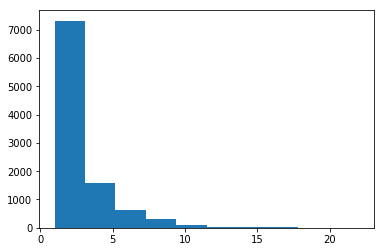

In [25]:
z = np.random.geometric(p=0.35, size=10000)

plt.hist(z)

<span style=color:red><b><u>EXERCISE 5.22</u></b> :   

How many <b>trials succeeded</b> after a <b>single run</b>?

In [27]:
(z == 1)

array([ True,  True, False, ..., False, False, False])

In [28]:
(z == 1).sum()

3519

In [26]:
(z == 1).sum() / 10000

0.3519

<span style=color:darkblue><b><u>EXEMPLE 5.3</u></b> :   
    
Another method for <b>Geometric Distribution</b> from scipy.stat, <b>geom.ppf()</b> method.

In [29]:
from scipy.stats import geom

p = 0.5
mean, var, skew, kurt = geom.stats(p, moments='mvsk')   

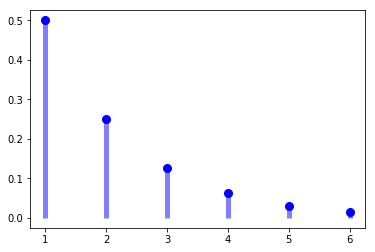

In [30]:
fig, ax = plt.subplots(1, 1)

x = np.arange(geom.ppf(0.01, p),
              geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

# <span style=color:darkblue>BINOMIAL DISTRIBUTION</span>

<span style=color:red><b><u>EXERCISE 5.23</u></b> :   

Suppose we randomly selected four individuals to participate in the “shock” study. What is the chance exactly one of them will be a success? Let’s call the four people Allen (A), Brittany (B), Caroline (C), and Damian (D) for convenience.

Also, suppose 35% of people are successes as in the previous version of this example.

<em><u>Let’s consider a scenario where one person refuses:</u></em>

\begin{align*}P(A = refuse, B = shock, C = shock, D = shock)\end{align*}
$%$   
\begin{align*}= P(A = refuse) \hspace{2mm} P(B = shock) \hspace{2mm} P(C = shock) \hspace{2mm} P(D = shock)\end{align*}
$%$   
\begin{align*}= (0.35)(0.65)(0.65)(0.65) = (0.35)^1(0.65)^3 = 0.096\end{align*}

<span style=color:red><b><u>EXERCISE 5.24</u></b> :   


<em><u>But there are three other scenarios</u></em>:$\:$ Brittany,$\:$ Caroline, or Damian$\:$ could have been the one to refuse.   

In each of these cases, the probability is again 

$$(0.35)^1(0.65)^3$$

These four scenarios exhaust all the possible ways that exactly one of these four people could refuse to administer the most severe shock, so the total probability is 

$$4\: x\: (0.35)^1(0.65)^3 = 0.38$$

The scenario outlined above is a special case of what is called the <span style=color:blue><b><u> 
Binomial Distribution.</u></b>

<div class="alert alert-warning alert-warning"><b><u>Binomial Distribution</u></b>   
$%$   

The <b>Binomial Distribution</b> describes the probability of having exactly $k$ successes in $n\hspace{3mm}$<b><u>independent Bernoulli</u></b> trials with <b>probability</b> of a success $p$.

in our example $$n = 4,\hspace{1cm} k = 1,\hspace{1cm} p = 0.35$$   
$%$   
A <b>Binomial Distribution</b> must satisfy <u>four conditions</u> :    

1. The outcomes must be Binary (Success / Failure)
2. Outcomes must be independent, one outcome doesn't affect another
3. The number of trials is set in advance.
4. Success on each trial (Probability of sucess must be the same)
</div>

However, we would like to determine the probabilities associated with the <span style=color:blue><b><u>Binomial Distribution</u></b></span> more generally, we want a formula where we can use $n$, $k$, and $p$ to obtain the probability.

To do this, let's reexamine each part of the example.

There were *four individuals* who could have been the <b>one to refuse</b>, and each of these four scenarios had the same <b>probability</b>. Thus, we could identify the <b>final probability</b> as   
$%$   
<center>[# of scenarios] x $P(single\:scenario)$</center>

- The first component of this equation ( <b>[# of scenarios]</b> ) is the number of <b>ways to arrange</b> the $k = 1$ <b>successes</b> among the $n = 4$ <b>trials</b>.   

- The second component ( $P(single\:scenario)$ )is the <b>probability</b> of any of the four (equally probable) scenarios.

<div class="alert alert-warning alert-warning"><b><u>Bernoulli Random Variable</u></b>

If $X$ is a <b>random variable</b> that takes value $1$ with <b>probability of success</b> $p$ and <b>0</b> with probability $1 − p$, then $X$ is a <b><u>Bernoulli random variable</u></b> with <b>mean</b> and <b>standard deviation</b>   
$%$   
\begin{align*}\mu\:=\:p\hspace{4cm} \sigma\:=\sqrt{p(1 - p)}\end{align*}
</div>

## <span style=color:darkred>Mean and Standard Deviation of Binomial Random Variable</span>

If a count $X$ has the <span style=color:blue><b>Binomial Distribution</b></span> with number of observations <span style=color:blue><b>$n$</b></span> and the probability of success <span style=color:blue><b>$p$</b></span>.

then mean and Standard Deviation of $X$  are :



<div class="alert alert-warning alert-warning"><b><u>Binomial Distribution</u></b>

Suppose the <b>probability</b> of a single trial being a <b>success</b> is <b>$\:p$</b>. Then the <b>probability</b> of observing exactly <b>$\:k$</b> <b>successes</b> in <b>$\:n$</b> <b>independent</b> trials is given by   
$%$   
\begin{align*}\:{n \choose k}p^{k}(1 - p)^{n-k}\hspace{2mm}=\hspace{2mm}\frac{n!}{k!(n-k)!}\hspace{2mm}p^{k}(1 - p)^{n-k}\end{align*}   
$%$    
- The <b>quantity</b> ${n \choose k}\hspace{2mm}$ is read <b>n choose k.</b>   
$%$   
- The <b>exclamation point</b> notation (e.g. $k!$) denotes a <b>factorial expression</b>.   
$%$   
Additionally, the <b>mean</b> and <b>standard deviation</b> of the number of observed
successes are:   
$%$   
\begin{align*}\mu\:=\:np\hspace{4cm} \sigma\:=\sqrt{np(1 - p)}\end{align*}   
$%$   
- <b><u>Binomial Distribution Parameters</u></b> "$n$" and "$p$"   
$%$   
    - $n$ = number of trials
    - $p$ = is the Probability of success of anyone trial.   

        $X$ is defined ...

        $$X\hspace{2mm}=\hspace{2mm}B(n,\:p)$$   

Posible values of $X$ are <b>whole numbers</b> from $0$ ($zero$) to $n$.   
$%$   
- <b><u>Binomial Coefficient</u></b> where:    
$%$   
    - $n$  = is the number of trials and
    - $k$  = is the number of successes.

\begin{align*}\:{n \choose k}\hspace{2mm}=\hspace{2mm}\frac{n!}{k!(n-k)!}\end{align*}   
$%$   

<b>Is it Binomial ?</b> <u>four conditions</u> to check :    
$%$   
1. The trials are <b>independent</b>.
2. The number of trials, <b><i>n</i></b>, is <b>fixed</b>.
3. Each trial <b>outcome</b> can be classified as a <b><i>success</i></b> or <b><i>failure</i></b>.
4. The probability of a success, <b><i>p</i></b>, is the <b>same for each trial</b>.
</div>

<span style=color:red><b><u>EXERCISE 5.25</u></b> :   
$%$   
<center>[# of scenarios] x $P(single\:scenario)$</center>

Using the formula, from <b>Binomial Coefficient</b> we can compute the first component of this equation ( <b>[# of scenarios]</b> ) the number of ways to <b>choose k = 1</b> successes in <b>n = 4</b> trials :

\begin{align*}\:{4\choose 1}\hspace{2mm}=\hspace{2mm}\frac{4!}{1!(4-1)!}\hspace{2mm}=\hspace{2mm}\frac{4!}{1!3!}\hspace{2mm}=\hspace{2mm}\frac{4\:x\:3\:x\:2\:x\:1}{(1)(3\:x\:2\:x\:1)}=\hspace{2mm}4\end{align*}  

<center>[# of scenarios] x $P(single\:scenario)$</center>

Substituting <b>n choose k</b> for the <b>number of scenarios</b> and <b>$p^{k}(1 − p)^{n−k}$</b> for the single scenario <b>probability</b>, yields the <b>General Binomial formula</b>. 

\begin{align*}\:{n \choose k}p^{k}(1 - p)^{n-k}\hspace{2mm}=\hspace{2mm}\frac{n!}{k!(n-k)!}\hspace{2mm}p^{k}(1 - p)^{n-k}\end{align*}   

Consider <b>P(single scenario)</b> under the general case of $k$ <b>successes</b> and $n−k$ <b>failures</b> in the $n$ <b>trials</b>. In any such scenario, we apply the <i>Multiplication Rule for independent events</i> :

$$p^{k}(1 - p)^{n-k}$$

\begin{align*}\:{4 \choose 1}\hspace{2mm}=\hspace{2mm}\frac{4!}{1!(4-1)!}\hspace{2mm}=\hspace{2mm}\frac{4!}{1!3!}\:=\hspace{2mm}\frac{4!\:x\:3!\:x\:2!\:x\:1!}{(1!)(3!\:x\:2!\:x\:1!)}\:=\hspace{2mm}4\end{align*}   

<span style=color:darkblue><b><u>SUMMARY :</u></b>

- The first step in using the <b>binomial model</b> is to check that the model is appropriate.   

- The second step is to identify <b>$n$, $p$, and $k$</b>.   

- The final step is to <b>apply the formulas</b> and <b>interpret</b> the results.

<span style=color:red><b><u>EXERCISE 5.26</u></b> :   

What is the probability that 3 of 8 randomly selected students will refuse to administer the worst shock, i.e. 5 of 8 will?

We would like to apply the <b>Binomial model</b>, so we <b>check</b> our <b>conditions</b> : 

- The number of trials is fixed (n = 8) (condition 2) and 
- each trial outcome can be classified as a success or failure (condition 3). 
- Because the sample is random, the trials are independent (condition 1) and 
- the probability of a success is the same for each trial (condition 4).   

In the outcome of interest, there are <b>$k$ = 3 successes</b> in <b>$n$ = 8 trials</b>, and the <b>probability</b> of a success is <b>$p$ = 0.35</b>.   

So the <b>probability</b> that <b>3 of 8</b> will refuse is given by

\begin{align*}\:{8\choose 3}(0.35)^{3}(1 - 0.35)^{8-3}\hspace{2mm}=\hspace{2mm}\frac{8!}{3!(8-3)!}\hspace{2mm}(0.35)^{3}(1 - 0.35)^{8-3}\end{align*}  
\begin{align*}=\hspace{2mm}\frac{8!}{3!5!}\hspace{2mm}(0.35)^{3}(1 - 0.35)^{5}\end{align*}  

Now lets deal with the <b>factorial part</b>:   

\begin{align*}\:=\hspace{2mm}\frac{8!}{3!5!}\hspace{2mm}=\hspace{2mm}\frac{8\:x\:7\:x\:6}{3\:x\:2\:x\:1}=\hspace{2mm}56\end{align*}  

Finally lets resolve the <b>final probability</b>, solving for the remaining expression $(0.35)^{3}(1 - 0.35)^{5}\:\approx 0.005$.   

Then the <b>final probability</b> is about <b>56 * 0.005 = 0.28</b>.

### <span style=color:darkred>Probability Distribution Function - PDF vs Cumulative Distribution - CDF</span>

What is the difference between a <span style=color:blue><b>Probability Distribution Function - (PDF)</b></span> and a <span style=color:blue><b>Cumulative Distribution Function - (CDF)</b></span>?
- <span style=color:blue><i><u>PDF assigns probability to each value of $X$ for 0,1,2, ... up to the value of $X$</u></i></span>.   
$%$   
  <i>Use PDF when given the exact value of $X$.</i>  Ex.: $p(x = 3)$   
$%$  
- <span style=color:blue><i><u>CDF is the Cumulative sum that adds up to (x = 0) + (x = 1) + ... + (x = k)</u></i></span>   
$%$   
  <i>Use CDF when given key words such as</i> :   
  - at most $X$ and
  - at least $X$

# <span style=color:darkblue>NEGATIVE BINOMIAL DISTRIBUTION</span>

The <span style=color:blue>Geometric distribution</span> describes the <b>probability</b> of observing the <b><i>first success</i></b> on the $n^{th}$ <b>trial</b>. 

The <span style=color:blue>Negative binomial distribution</span> describes the <b>probability</b> of observing the $k^{th}$ success on the $n^{th}$ <b>trial</b>.

<div class="alert alert-warning alert-warning"><b><u>Negative Binomial Distribution</u></b>   

The <b>Negative binomial distribution</b> describes the <b>probability</b> of observing the <b><i>$k^{th}$</i></b> success on the <b><i>$n^{th}$</i></b> trial:
    
$%$   
\begin{align*}P(the\:k^{th}\:success\:on\:the\: n^{th}\: trial)\hspace{2mm}=\hspace{2mm}{n-1 \choose k - 1}\hspace{2mm}p^{k}(1 - p)^{n-k}\end{align*}   
$%$    
where <b><i>p</i></b> is the <b>probability</b> an individual trial is a <b>success</b>. All <b>trials</b> are assumed to be <b>independent</b>.   
$%$   
To identify a <span style=color:blue>Negative binomial</span> case, we <b><u>check 4 conditions</u></b>. The first three are common to the <span style=color:blue>Binomial distribution</span>.   
$%$   

1. The trials are <b>independent</b>.   

2. Each trial <b>outcome</b> can be classified as a <i><b>success</b></i> or <i><b>failure</b></i>.   

3. The probability of a success <b><i>(p)</i></b> is the <b>same for each trial</b>.   

4. <b><u>The last trial must be a success</u></b>.
</div>

- In the <span style=color:blue>Binomial case</span>, we typically have a <b>fixed number of trials</b> and instead consider the <b>number of successes</b>.   
$%$   
- In the <span style=color:blue>Negative Binomial case</span>, we examine how many <b>trials it takes to observe a fixed number of successes</b> and require that the <b>last observation be a success</b>.

# <span style=color:darkblue>POISSON DISTRIBUTION</span>

The <span style=color:blue>Poisson distribution</span> is often useful for estimating the <b>number of events in a large population</b> over a <b>unit of time</b>. For instance, consider each of the following events:   

* having a heart attack,
* getting married, and
* getting struck by lightning.

The <span style=color:blue>Poisson distribution</span> helps us describe the number of such events that will occur in a day for a fixed population if the individuals within the population are independent.   

The <span style=color:blue>Poisson distribution</span> could also be used over another unit of time, such as an hour or a week.

<div class="alert alert-warning alert-warning"><b><u>Poisson Distribution</u></b>

Suppose we are watching for events and the number of observed events follows a <b>Poisson distribution</b> with <b>rate $\lambda$</b>. Then   
$%$   
\begin{align*}P(observe\hspace{2mm} k\hspace{2mm} events) =\frac{\lambda^{k}e^{−\lambda}}{k!}\end{align*}   
$%$   
The <b><u>rate</u></b> for a <b>Poisson distribution</b> is the <b>average number of occurrences</b> in a mostly fixed population per <b><i>unit of time</i></b>.   
$%$   
The <b><u>parameter</u></b> in the <b>Poisson distribution</b> is the <b>rate or how many events we expect to observe</b>. it is typically denoted by <b>$\lambda$</b> (the Greek letter <b>lambda</b>) or $\mu$.   
$%$   
Using the rate, we can describe the probability of observing exactly k events in a single unit of time.   
$%$   
where : 
- $k$ may take a value $0, 1, 2$, and so on, and   
- $k!$ represents <b>k-factorial</b>.   
- The letter $e \approx$ 2.718 is the base of the natural logarithm.   
- The <b>mean</b> and <b>standard deviation</b> of this distribution are $\lambda$ and $\sqrt{\lambda}$, respectively.</b>
</div>

Let's see few simple guidelines that can be used for an initial evaluation of whether the **``Poisson model``** would be appropriate.

<b><u>Is it Poisson?</u></b>

A random variable may follow a Poisson distribution if we are looking for the **number of events**, the population that generates such events **is large**, and the **events** occur **independently** of each other.